In [2]:
import numpy as np
import scipy
from scipy.linalg import solve 
import matplotlib.pyplot as plt

In [98]:
N=1000
l_wing_range=int(1055/3755*N)
fule_range=int(1385*N/3755)
half=int(N/2)
print(l_wing_range)
print(fule_range)
wing_span=37.5
aoa=2/180*np.pi
Uinf=150
dy=(wing_span)/N

280
368


In [99]:
BC=np.zeros((N,2),dtype=np.float64)
LL=np.zeros((N,2),dtype=np.float64)
b=np.zeros(N,dtype=np.float64)
chord=np.zeros(N,dtype=np.float64)
LE_slope=np.tan(50*np.pi/180)
LL_slope=np.tan(27*np.pi/180)+0.75*(np.tan(50*np.pi/180)-np.tan(27*np.pi/180))
BC_slope=np.tan(27*np.pi/180)+0.25*(np.tan(50*np.pi/180)-np.tan(27*np.pi/180))
for i in range(half):
    chord[i]=2+i*2*(LL_slope-BC_slope)*dy
    chord[N-i-1]=chord[i]+2*(LL_slope-BC_slope)*dy
    BC[i,0]=-wing_span/2+(0.5+i)*dy
    BC[i,1]=(0.5+i)*dy*BC_slope
    BC[N-i-1,0]=-wing_span/2+(0.5+N-i-1)*dy
    BC[N-i-1,1]=BC[i,1]+dy*BC_slope
    LL[i,0]=BC[i,0]-dy/2
    LL[i,1]=i*dy*LL_slope+chord[i]/2
    LL[N-i-1,0]=-wing_span/2+(N-i-1)*dy
    LL[N-i-1,1]=LL[i,1]+dy*LL_slope
    #print(BC[i,0])
    #print(LL[i,0])
    b[i]=Uinf*aoa
    b[N-i-1]=Uinf*aoa

In [100]:
#Bound
A=np.zeros((N,N),dtype=np.float64)
#Induced
for j in range(N):
    for i in range(half):
        d_l=BC[j,0]-LL[i,0]
        d_r=BC[j,0]-LL[N-i-1,0]
        cb_l=(LL[i,1]-BC[j,1])/((d_l*d_l+(LL[i,1]-BC[j,1])**2)**0.5)
        #cb_2=(LL[i,1]-0.75*chord[i]-BC[j,1])/((d*d+(LL[i,1]-0.75*chord[i]-BC[j,1])**2)**0.5)
        cb_2=-1
        cb_r=(LL[N-i-1,1]-BC[j,1])/((d_r*d_r+(LL[N-i-1,1]-BC[j,1])**2)**0.5)
        A[j,i]-=(cb_l-cb_2)*dy/(4*np.pi*d_l)
        A[j,N-i-1]+=(cb_r-cb_2)*dy/(4*np.pi*d_r)
for j in range(N):
    for i in range(half):
        '''d1_left=(pow(BC[j,0]-LL[i,0],2)+pow(BC[j,1]-LL[i,1],2))**0.5
        d1_right=(pow(BC[j,0]-LL[N-i-1,0],2)+pow(BC[j,1]-LL[N-1-i,1],2))**0.5
        dp1_left=(BC[j,0]-LL[i,0])*dy+(BC[j,1]-LL[i,1])*dy*LL_slope
        dp1_right=(BC[j,0]-LL[N-i-1,0])*dy-(BC[j,1]-LL[N-i-1,1])*dy*LL_slope
        if (i!=0):
            d2_left=(pow(BC[j,0]-LL[i+1,0],2)+pow(BC[j,1]-LL[i+1,1],2))**0.5
            d2_right=(pow(BC[j,0]-LL[N-i,0],2)+pow(BC[j,1]-LL[N-i,1],2))**0.5
            dp2_left=(BC[j,0]-LL[i+1,0])*dy+(BC[j,1]-LL[i+1,1])*dy*LL_slope
            dp2_right=(BC[j,0]-LL[N-i,0])*dy-(BC[j,1]-LL[N-i,1])*dy*LL_slope
        else:
            d2_left=(pow(BC[j,0]-LL[1,0],2)+pow(BC[j,1]-LL[1,1],2))**0.5
            d2_right=(pow(BC[j,0]-wing_span/2,2)+pow(BC[j,1]-1.0,2))**0.5
            dp2_left=(BC[j,0]-LL[1,0])*dy+(BC[j,1]-LL[1,1])*dy*LL_slope
            dp2_right=(BC[j,0]-wing_span/2)*dy-(BC[j,1]-1.0)*dy*LL_slope
            
        cb_1_l=dp1_left/(dy*((1+LL_slope*LL_slope)**0.5)*d1_left)
        cb_2_l=dp2_left/(dy*((1+LL_slope*LL_slope)**0.5)*d2_left)
        cb_1_r=dp1_right/(dy*((1+LL_slope*LL_slope)**0.5)*d1_right)
        cb_2_r=dp2_right/(dy*((1+LL_slope*LL_slope)**0.5)*d2_right)
        A[j,i]-=dy*(cb_1_l-cb_2_l)/(2*np.pi*chord[j])
        A[j,N-1-i]+=dy*(cb_1_r-cb_2_r)/(2*np.pi*chord[j])'''
        dl=(pow(BC[j,0]-LL[i,0],2)+pow(BC[j,1]-LL[i,1],2))**0.5
        dr=(pow(BC[j,0]-LL[N-i-1,0],2)+pow(BC[j,1]-LL[N-1-i,1],2))**0.5
        dm_l=(pow(BC[j,0]-LL[half-1,0],2)+pow(BC[j,1]-LL[half-1,1],2))**0.5
        dm_r=(pow(BC[j,0]-LL[half,0],2)+pow(BC[j,1]-LL[half,1],2))**0.5
        dp_middle_l=(BC[j,0]-LL[half-1,0])*dy+(BC[j,1]-LL[half-1,1])*dy*LL_slope
        dp_middle_r=(BC[j,0]-LL[half,0])*dy-(BC[j,1]-LL[half,1])*dy*LL_slope
        dp_left=(BC[j,0]-LL[i,0])*dy+(BC[j,1]-LL[i,1])*dy*LL_slope
        dp_right=(BC[j,0]-LL[N-i-1,0])*dy-(BC[j,1]-LL[N-i-1,1])*dy*LL_slope
        cb_l=dp_left/(dy*((1+LL_slope*LL_slope)**0.5)*dl)
        cb_r=dp_right/(dy*((1+LL_slope*LL_slope)**0.5)*dr)
        cb_ml=dp_middle_l/(dy*((1+LL_slope*LL_slope)**0.5)*dm_l)
        cb_mr=dp_middle_r/(dy*((1+LL_slope*LL_slope)**0.5)*dm_r)
        A[j,i]+=dy*(cb_l-cb_ml)/(2*np.pi*chord[j])
        A[j,N-i-1]-=dy*(cb_r-cb_mr)/(2*np.pi*chord[j])

In [101]:
b=np.asarray(b)
gamma1=np.linalg.solve(A,b)
np.linalg.cond(A)

12.862021410337853

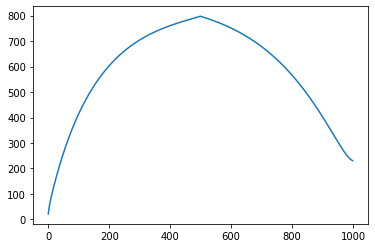

In [103]:
plt.plot(np.cumsum(gamma1)*dy)

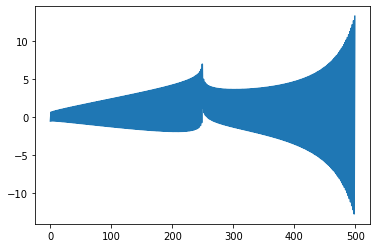